# Homework 2

# Pricing Diamonds


The dataset contains the following features.
- price : price of the dimaond in dollars.

- carat : weight of the diamond

- cut : quality of the cut

- color : color of the diamond, J (worst) to D (best)

- clarity : I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)

- x : length (mm) 

- y :  width (mm) 

- z : depth (mm) 

- depth : 2 * z / (x + y)

- table :  width of top of diamond relative to widest point



## Your job

- Try to understand the data, visualize it. You may use unsupervised learning methods at this stage.
- The main aim is then to predict, using supervised learning methods, the price of diamonds based on their different quality features.

## We want to see the following things

- Prediction results and mean squared error obtained on the test set for the methods you considered.
- A discussion about the impact of the hyperparameters of the methods on your predictions.
- A clear comparison between your solutions (a table, and/or plots comparing the results obtained with different methods).
- A discussion about the difficulties encountered if applicable.
- You'll get a good grade if you reach a good accuracy **and** if your notebook is clean, with clear graphs and explanations of what you did **and** if you did efficient calibration of the methods and serious comparisons between different methods
- You will send your notebook **containing** the results (**WE WON'T RUN YOUR NOTEBOOK**), namely with the graphs and results that you want to show, as a **unique** jupyter notebook file (`.ipynb` extension). We won't open any other supplementary file.

## Hand in your assignment  before 11/11/20 23h55 :

- via Moodle for all Université de Paris students
- via email for Paris 1 students, subject [Machine Learning DM2], aurelie.fischer@univ-paris-diderot.fr


## Example of methods

Unsupervised learning methods and visualization :
- PCA
- k-means
- mixture models
- spectral clustering
...

Supervised learning methods :
- discriminant analysis
- logistic regression
- SVM
- regression trees
- bagging
- random forests
- boosting
- ...

- http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/05_measuring_prediction_performance.html
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
- https://www.dataquest.io/blog/machine-learning-tutorial/
- https://randerson112358.medium.com/predict-stock-prices-using-python-machine-learning-53aa024da20a
- https://www.dataquest.io/blog/machine-learning-tutorial/

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("husl")
import matplotlib.pyplot as plt
%matplotlib inline
# Permet a une cellule d'avoir plus d'un display en sortie
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

shuffle data, create quantitative variables, 

In [138]:
diamond_df = pd.read_csv('diamonds.csv')
diamond_df.drop("Unnamed: 0",axis =1, inplace=True)

In [139]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [140]:
diamond_df.shape

(53940, 10)

In [141]:
diamond_df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
diamond_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
diamond_df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
print(diamond_df["cut"].unique())
print(diamond_df["color"].unique())
print(diamond_df["clarity"].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [134]:
# Using the pandas function to create dummy data from categorical values
# creates too many columns as it involves one-hot encoding
# It would be better to use this method as it keeps things tidy and we
# can control better the value for each characteristic
    
clarity_class = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
cut_class = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
color_class = {"J": 1,"I": 2,"H": 3,"G": 4,"F": 5,"E": 6,"D": 7}

In [142]:
# Creation of column volume from columns x,y,z

diamond_df['volume'] = diamond_df['x']*diamond_df['y']*diamond_df['z']
# Delete this columns or leave them?? since we already have the volumne
diamond_df.drop(['x','y','z'],axis=1,inplace=True)

diamond_df = diamond_df[diamond_df['volume']<1000] 
#To delete any outlier??

In [143]:
# Creating categorical variables for 'cut', 'color', and 'clarity'
# We will change our method by using the previously created dicts for each of these columns
#diamond_df = pd.get_dummies(diamond_df, columns=["cut", "color", "clarity"])

diamond_df['cut'] = diamond_df['cut'].map(cut_class)
diamond_df['clarity'] = diamond_df['clarity'].map(clarity_class)
diamond_df['color'] = diamond_df['color'].map(color_class)

In [144]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


### All this data transformations are for us to be able to perform analytics of all variables when using unsupervised and supervised learning methods. Comparing the variables between them and obtain insight into the relationship between variables

# Data Visualization

In [145]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


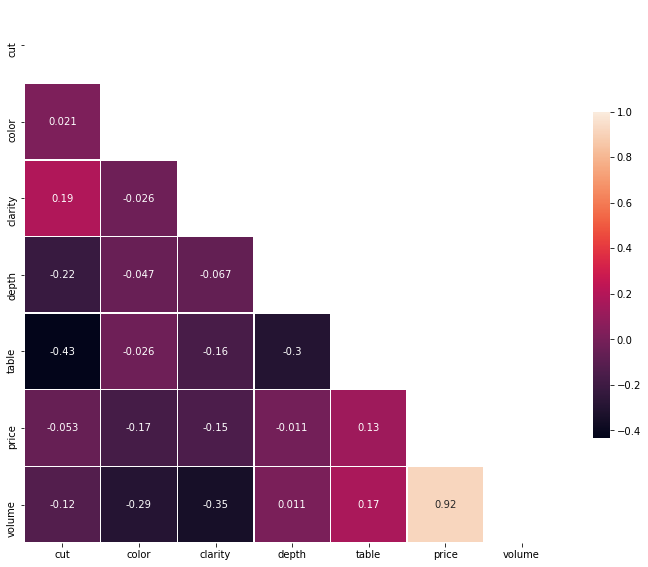

In [15]:
# Correlation between variables but with a mask for upper triangle because it is a mirro image of the 
# lower triangle

corr = diamond_df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, mask=mask, vmax=1, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Text(0.5, 1.0, 'Distribution of Diamond Volume')

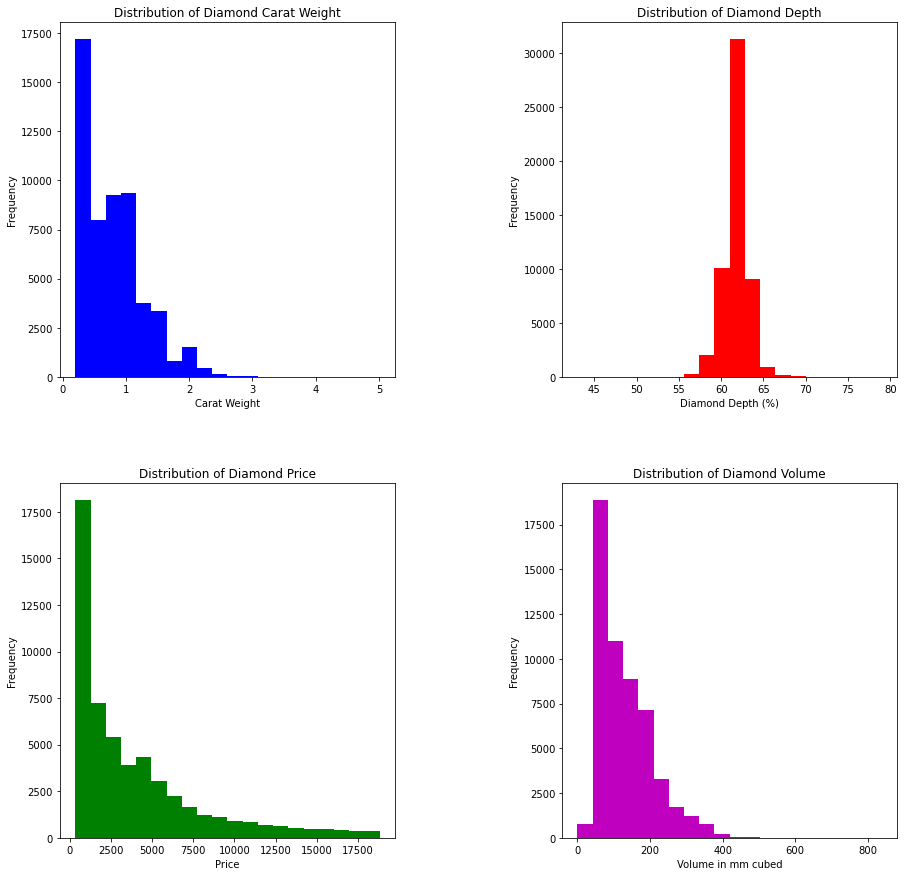

In [205]:
plt.figure(figsize=[15,15])
plt.subplots_adjust(wspace=.5, hspace=.3)
# First subplot showing the diamond carat weight distribution
plt.subplot(221)
plt.hist(diamond_df['carat'],bins=20,color='b')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')

# Second subplot showing the diamond depth distribution
plt.subplot(222)
plt.hist(diamond_df['depth'],bins=20,color='r')
plt.xlabel('Diamond Depth (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Depth')

# Third subplot showing the diamond price distribution
plt.subplot(223)
plt.hist(diamond_df['price'],bins=20,color='g')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

# Fourth subplot showing the diamond volume distribution
plt.subplot(224)
plt.hist(diamond_df['volume'],bins=20,color='m')
plt.xlabel('Volume in mm cubed')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Volume')

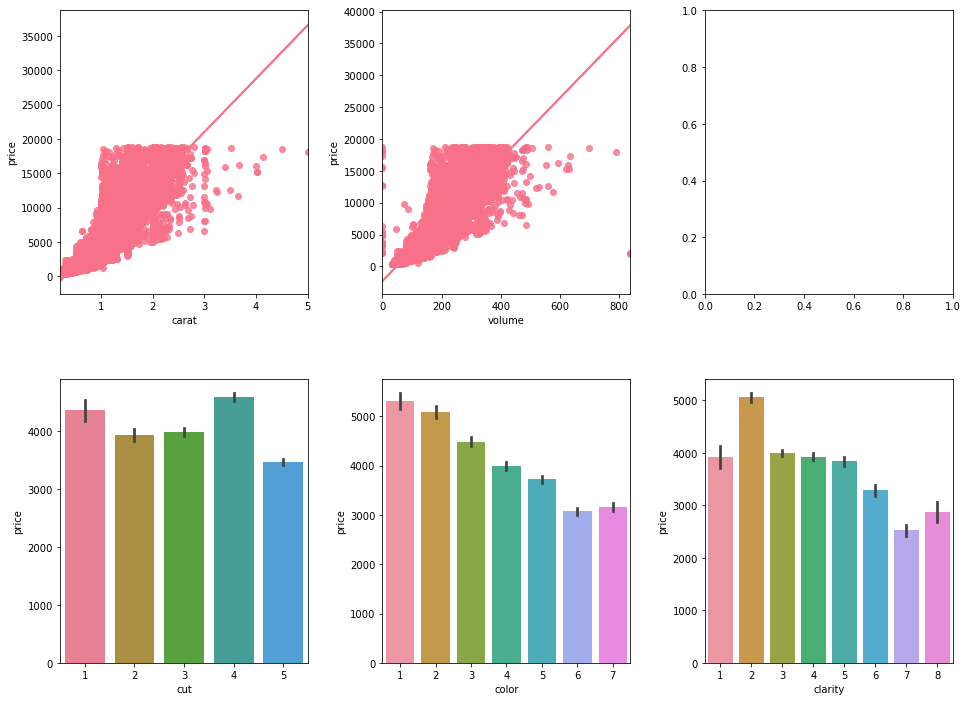

In [147]:
fig, axis = plt.subplots(2, 3,figsize=(16,12))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)
sns.regplot(x = 'carat', y = 'price', data=diamond_df, ax = axis[0,0])

# This is the reason we need to eliminate outliers!!
sns.regplot(x = 'volume', y = 'price', data=diamond_df, ax = axis[0,1])

# Order the plots from worst to best
#sns.barplot(x = 'cut', y = 'price', order=['Fair','Good','Very Good','Premium','Ideal'], data=diamond_df, ax = axis[1,0])
#sns.barplot(x = 'color', y = 'price', order=['J','I','H','G','F','E','D'], data=diamond_df, ax = axis[1,1])
#sns.barplot(x = 'clarity', y = 'price', order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'], data=diamond_df, ax = axis[1,2])

# Order the plots from worst to best
sns.barplot(x = 'cut', y = 'price',  data=diamond_df, ax = axis[1,0])
sns.barplot(x = 'color', y = 'price', data=diamond_df, ax = axis[1,1])
sns.barplot(x = 'clarity', y = 'price', data=diamond_df, ax = axis[1,2])

# Unsupervised learning

In [207]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline

In [208]:
diamond_df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


We need to normalize the values of the dataset because the learning methods are very affected by the scale of values>!!

In [209]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X_std = diamond_df.loc[:, features].values
# Separating out the target
y = diamond_df.loc[:,['price']].values
# Standardizing the features
X_std = StandardScaler().fit_transform(X)

In [210]:
X_std.shape, y.shape

((53939, 7), (53939, 1))

## PCA

In [316]:
n = 7
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents)
PCA_df = pd.concat([principalDf, diamond_df[['price']]], axis = 1)

In [317]:
PCA_df.head()

,0,1,2,3,4,5,6,price
0,-1.730837,-0.245986,0.218731,-1.704798,-1.208019,0.164139,-0.009349,326.0
1,-1.132473,2.273445,-0.999194,-0.678459,-0.793943,-0.451753,-0.000368,326.0
2,-0.673607,4.775181,-2.432965,0.678438,0.118200,0.437558,-0.006958,327.0
3,-0.874798,0.032101,0.357155,1.263062,-1.384520,-0.437865,0.006373,334.0
4,0.182721,0.770545,1.883912,1.570499,-2.243268,0.337714,0.040060,335.0


In [318]:
# Computation cumulative sum of explained variances
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

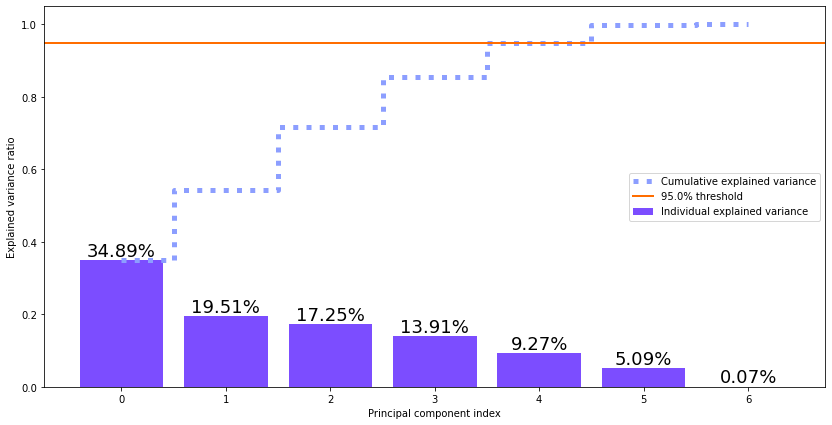

In [324]:
# Plot explained variances
threshold = 0.95
plt.figure(figsize=(14,7))

plt.bar(range(n), var_exp,label='Individual explained variance', color="#7C4DFF")
plt.step(range(n), cum_var_exp,color="#8C9EFF", where='mid',ls=":", lw=5, label='Cumulative explained variance')
plt.axhline(y=threshold, color='#FF6D00', ls='-', lw=2, label="{}% threshold".format(threshold*100))
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

for index, value in enumerate(var_exp):
    plt.text(index, value, "{0:.2f}%".format(value*100), fontsize=18, horizontalalignment='center', verticalalignment='bottom',)
    
plt.legend(loc='best')
plt.show()

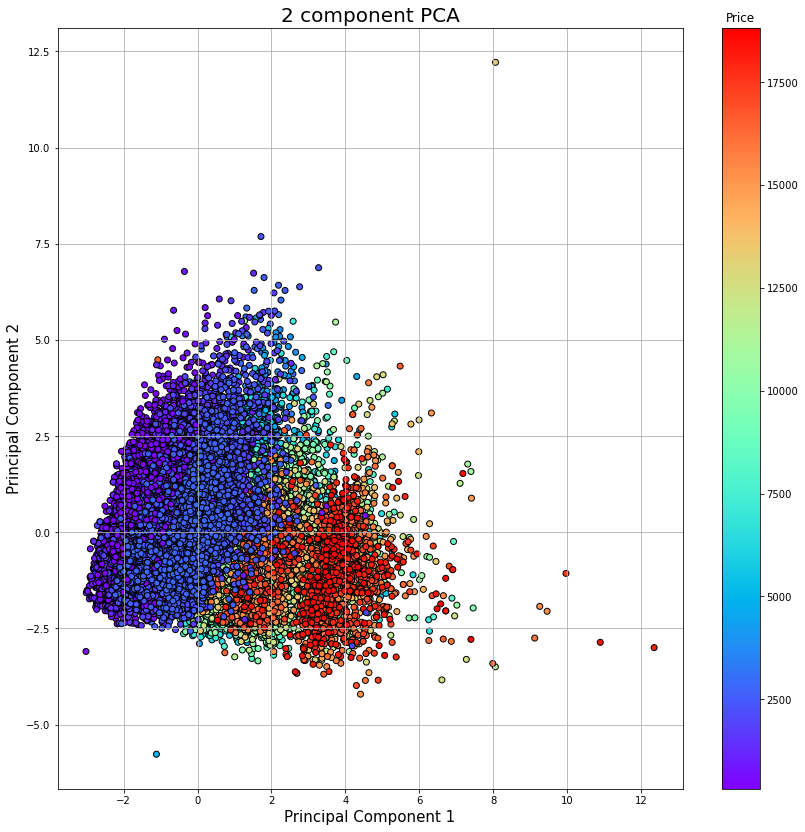

In [362]:
plt.figure(figsize = (14,14))
sc = plt.scatter(x=PCA_df[0], y=PCA_df[1], c=PCA_df["price"], cmap='rainbow', edgecolor='k')

plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.colorbar(sc).ax.set_title('Price')
plt.grid()
plt.show()

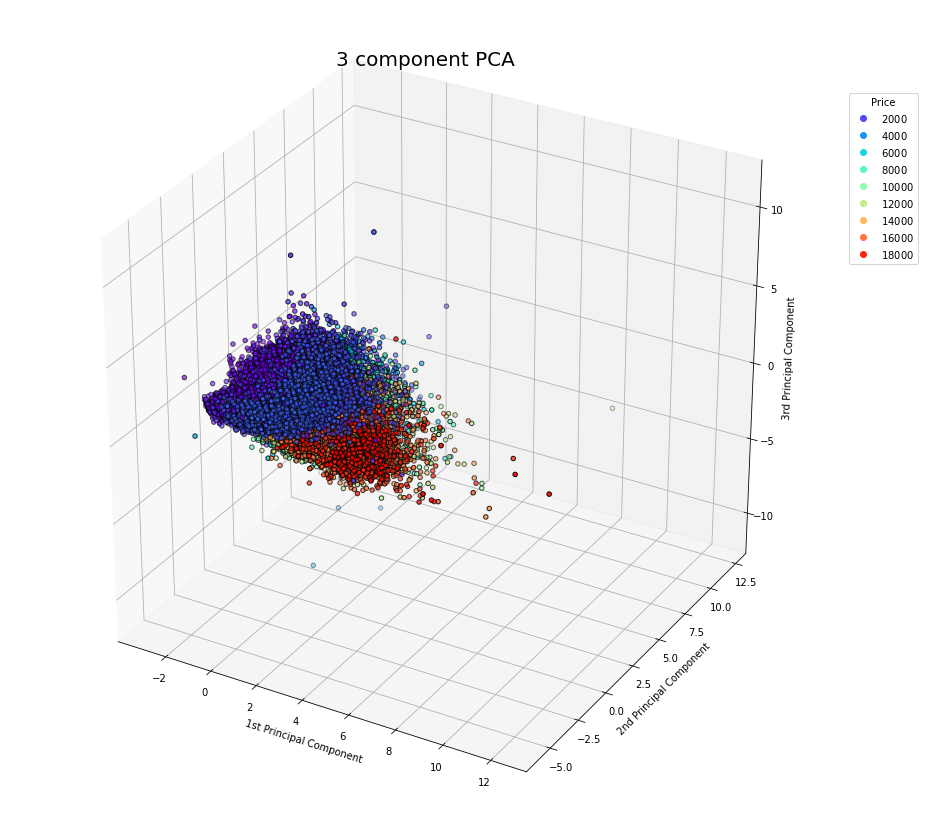

In [363]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(PCA_df[0], PCA_df[1], PCA_df[2], c=PCA_df["price"], cmap='rainbow', edgecolor='k')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1, .9), loc=2, title="Price")
plt.title("3 component PCA", fontsize=20)
ax.set_xlabel('1st Principal Component')
ax.set_ylabel('2nd Principal Component')
ax.set_zlabel('3rd Principal Component')
plt.show()

In [333]:
hmap = pd.DataFrame(pca.components_,columns=features)
hmap.rename(index={0: "PC1", 1: "PC2", 2: "PC3", 3: "PC4", 4: "PC5", 5: "PC6", 6: "PC7"}, inplace=True)
hmap.head()

,carat,cut,color,clarity,depth,table,volume
PC1,0.595239,-0.233452,-0.241697,-0.343595,0.023637,0.253098,0.591691
PC2,-0.212193,-0.531803,0.307510,-0.127507,-0.261536,0.666870,-0.219596
PC3,-0.093655,-0.470133,0.104122,-0.202369,0.814259,-0.208211,-0.109723
PC4,-0.081744,-0.288844,-0.728786,0.568073,0.096837,0.197377,-0.087845
PC5,0.287564,-0.126650,0.551682,0.708301,0.106661,0.008677,0.289434


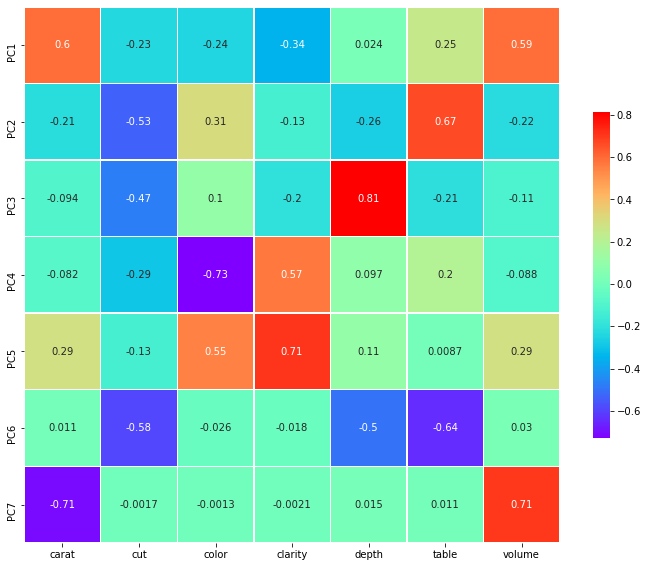

In [334]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(hmap, cmap="rainbow", annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## K-Means

In [311]:
Sum_of_squared_distances = []
K = range(1,15)
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km = km.fit(X_std)
    Sum_of_squared_distances.append(km.inertia_)

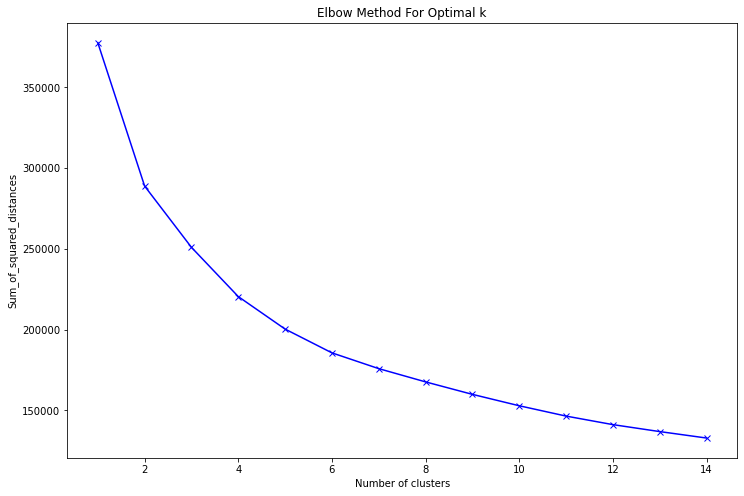

In [328]:
fig = plt.figure(figsize=(12,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

In [81]:
kmeans = KMeans(n_clusters=6).fit(data_transformed)
centroids = kmeans.cluster_centers_
centroids.shape
kmeans.c

(6, 8)

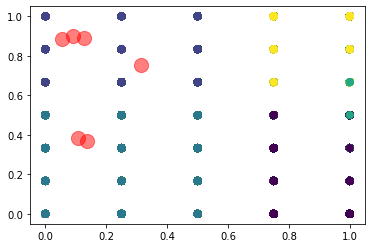

In [75]:
plt.scatter(data_transformed[:, 1], data_transformed[:, 2], c=kmeans.labels_.astype(float), s=50, cmap='viridis')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.5);

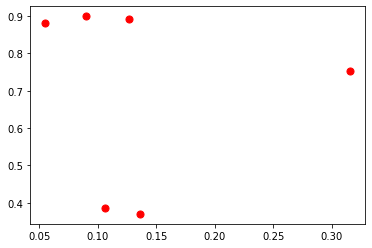

In [50]:
#plt.scatter(diamond_df['carat'], diamond_df['price'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

# Supervised Learning

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [445]:
def plot_model_accuracy(expected, predicted, model):
    fontsize=16
    
    rms = np.sqrt(np.mean((predicted - expected) ** 2))[0]
    acc = model.score(X_test, y_test)*100
    textstr = 'RMS = ${0:.2f}\nAccuracy Score = {1:.2f}%'.format(rms,acc)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', alpha=.5, color="#F53677", ec="k")
    
    plt.figure(figsize = (12,6))
    plt.scatter(expected, predicted, c="#5536F5", edgecolor='k') 
    plt.title(type(model).__name__, fontsize=fontsize)
    plt.xlabel('True price', fontsize=fontsize)
    plt.ylabel('Predicted price', fontsize=fontsize)
    xpoints = ypoints = plt.xlim()
    y_max = max(plt.ylim())
    plt.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)
    plt.text(0, y_max-1e3, textstr, fontsize=14, verticalalignment='top', bbox=props)
    plt.show()

In [39]:
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'volume']
# Separating out the features
X = diamond_df.loc[:, features]
# Separating out the target
y = diamond_df.loc[:,['price']]

In [40]:
X.head()

,carat,cut,color,clarity,depth,table,volume
0,0.23,5,6,2,61.5,55.0,38.202030
1,0.21,4,6,3,59.8,61.0,34.505856
2,0.23,2,6,5,56.9,65.0,38.076885
3,0.29,4,2,4,62.4,58.0,46.724580
4,0.31,2,1,2,63.3,58.0,51.917250


In [41]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linR = LinearRegression()
linR.fit(X_train, y_train)

LinearRegression()

In [57]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1)

In [58]:
predictedLR = linR.predict(X_test)
predictedLR = predictedLR.reshape((predictedLR.shape[0], 1))

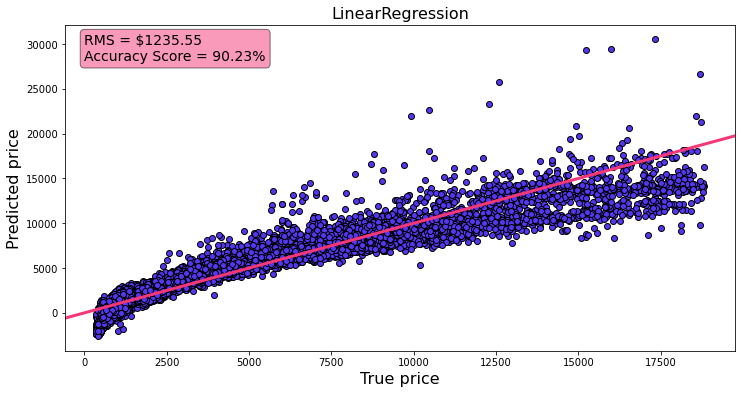

In [446]:
plot_model_accuracy(y_test, predictedLR, linR)

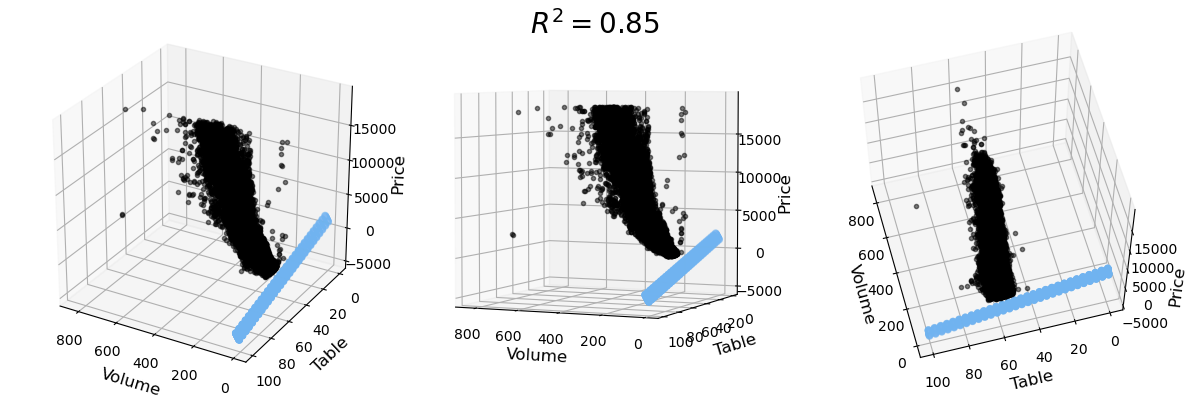

In [78]:
#Unrelated to above part
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

######################################## Data preparation #########################################


X1 = diamond_df[['volume', 'table']].values.reshape(-1,2)
Y = diamond_df['price']

######################## Prepare model data point for visualization ###############################

x = X1[:, 0]
y = X1[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30) 
y_pred = np.linspace(0, 100, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

################################################ Train #############################################

ols = linear_model.LinearRegression()
model = ols.fit(X1, Y)
predicted = model.predict(model_viz)

############################################## Evaluate ############################################

r2 = model.score(X1, Y)

############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='.', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Volume', fontsize=12)
    ax.set_ylabel('Table', fontsize=12)
    ax.set_zlabel('Price', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

## Gradient Boosting Tree Regression

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
gBoost = GradientBoostingRegressor()
gBoost.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [169]:
predictedgBoost = gBoost.predict(X_test)
predictedgBoost = predictedgBoost.reshape((predictedgBoost.shape[0], 1))

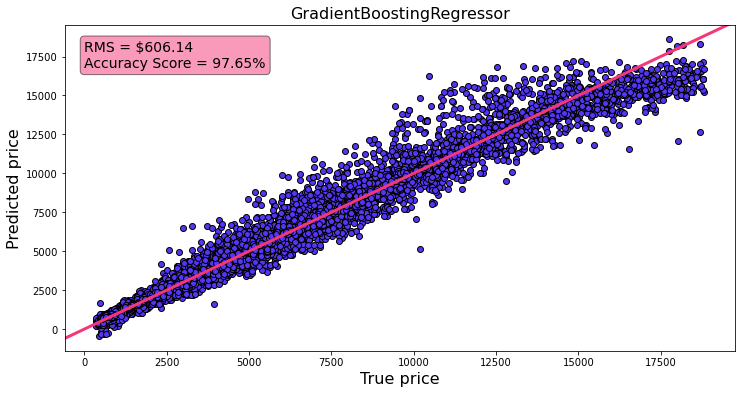

In [447]:
plot_model_accuracy(y_test, predictedgBoost, gBoost)

## AdaBoost

In [62]:
from sklearn.ensemble import AdaBoostRegressor

In [63]:
adaBoost = AdaBoostRegressor()
adaBoost.fit(X_train, y_train.values.ravel())

AdaBoostRegressor()

In [64]:
predictedaBoost = adaBoost.predict(X_test)
predictedaBoost = predictedaBoost.reshape((predictedaBoost.shape[0], 1))

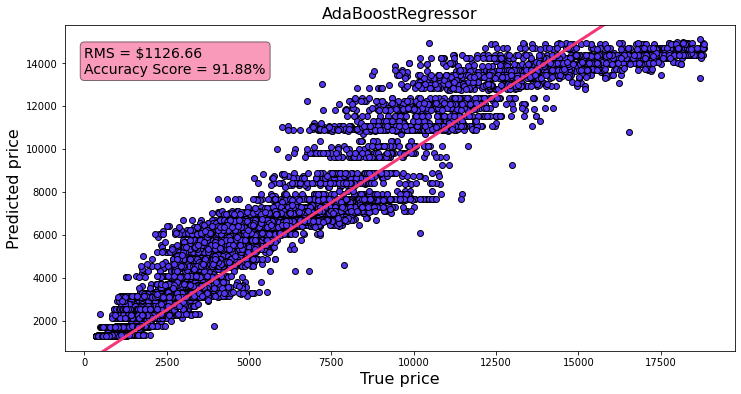

In [448]:
plot_model_accuracy(y_test, predictedaBoost, adaBoost)

## xGBoost

In [35]:
import xgboost as xgb

In [44]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

In [45]:
xgb_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [173]:
predictedxgBoost = xgb_model.predict(X_test)
predictedxgBoost = predictedxgBoost.reshape((predictedxgBoost.shape[0], 1))

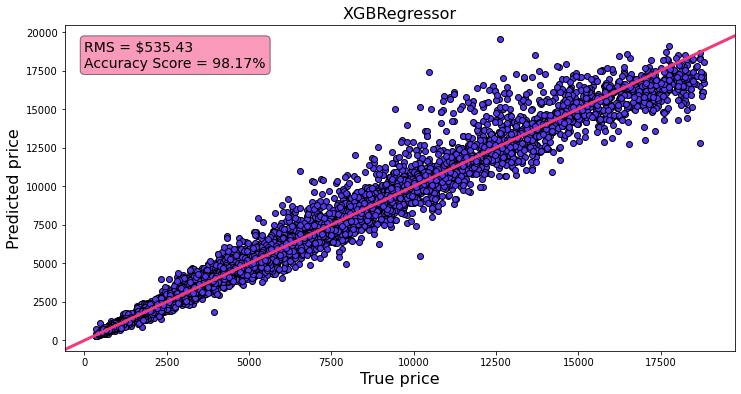

In [449]:
plot_model_accuracy(y_test, predictedxgBoost, xgb_model)

## SVR

In [175]:
from sklearn.svm import SVR 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [176]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1) 
svr_rbf.fit(X_train, y_train.values.ravel())

SVR(C=100, gamma=0.1)

In [16]:
regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))])

In [177]:
predictedSVR = svr_rbf.predict(X_test)
predictedSVR = predictedSVR.reshape((predictedSVR.shape[0], 1))

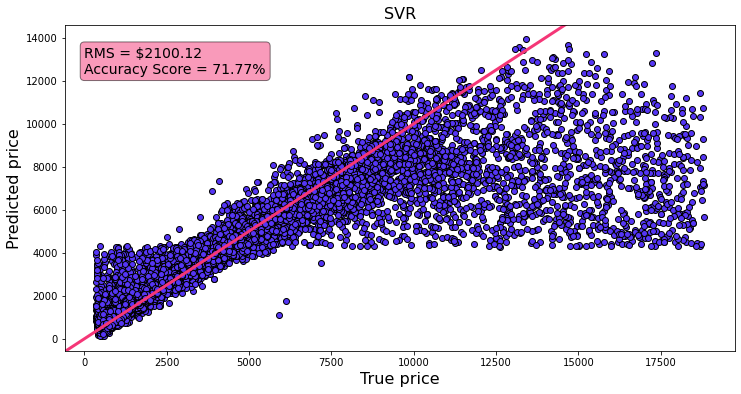

In [450]:
plot_model_accuracy(y_test, predictedSVR, svr_rbf)

In [67]:
# Only using linear kernel to run faster, can uncomment to use polynomial and radial basis function kernel.

svr_rbf = SVR(kernel='rbf', C=1, gamma=0.1)
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly', C=1, degree=2)

svr_rbf.fit(X_train, y_train.values.ravel())
svr_lin.fit(X_train, y_train.values.ravel())
svr_poly.fit(X_train, y_train.values.ravel())

SVR(C=1, degree=2, kernel='poly')

In [68]:
predictedRBF = svr_rbf.predict(X_test)
predictedRBF = predictedRBF.reshape((predictedRBF.shape[0], 1))

predictedSVRL = svr_lin.predict(X_test)
predictedSVRL = predictedSVRL.reshape((predictedSVRL.shape[0], 1))

predictedPOLY = svr_poly.predict(X_test)
predictedPOLY = predictedPOLY.reshape((predictedPOLY.shape[0], 1))

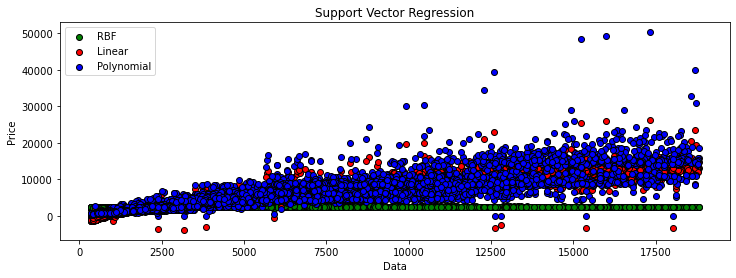

In [458]:
#plt.scatter(X_test, y_test, c='k', label='data')
plt.figure(figsize=(12, 4))
plt.scatter(y_test, predictedRBF, c='g', label='RBF', ec="k")
plt.scatter(y_test, predictedSVRL, c='r', label='Linear', ec="k")
plt.scatter(y_test, predictedPOLY, c='b', label='Polynomial', ec="k")
plt.xlabel('Data')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

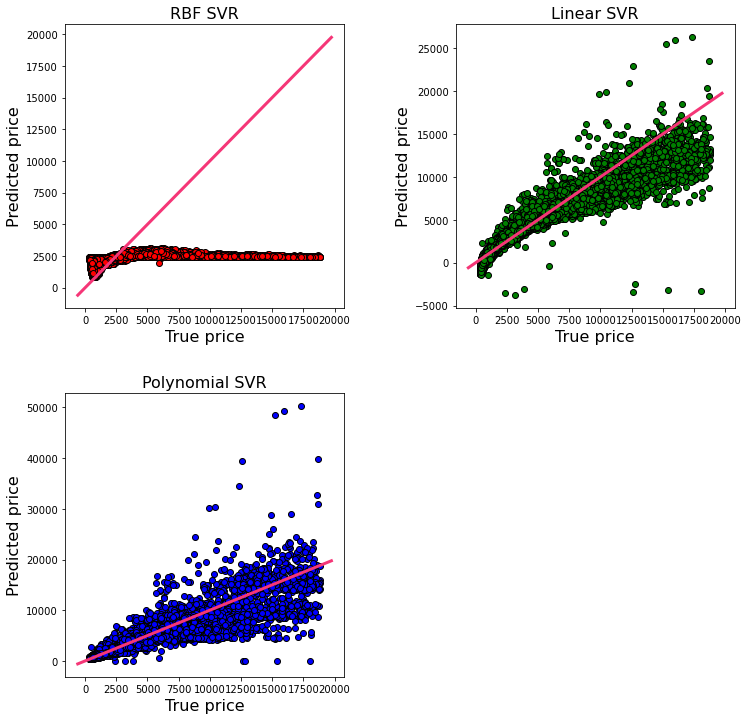

In [473]:
fig = plt.figure(figsize=(12,12))
#xpoints = ypoints = plt.xlim()
plt.subplots_adjust(wspace = 0.4, hspace = 0.3)


ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

ax1.scatter(y_test, predictedRBF, c='r', label='RBF', ec="k")
ax1.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)

ax2.scatter(y_test, predictedSVRL, c='g', label='Linear', ec="k")
ax2.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)

ax3.scatter(y_test, predictedPOLY, c='b', label='Polynomial', ec="k")
ax3.plot(xpoints, ypoints, linestyle='-', color='#F53677', lw=3, scalex=False, scaley=False)

fontsize = 16

ax1.set_xlabel('True price', fontsize=fontsize)
ax2.set_xlabel('True price', fontsize=fontsize)
ax3.set_xlabel('True price', fontsize=fontsize)

ax1.set_ylabel('Predicted price', fontsize=fontsize)
ax2.set_ylabel('Predicted price', fontsize=fontsize)
ax3.set_ylabel('Predicted price', fontsize=fontsize)

ax1.set_title('RBF SVR', fontsize=fontsize)
ax2.set_title('Linear SVR', fontsize=fontsize)
ax3.set_title('Polynomial SVR', fontsize=fontsize)
plt.show()

In [49]:
print("RBF algorithm")
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((predictedRBF - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(svr_rbf.score(X_test, y_test)*100), "\n")

print("Linear algorithm")
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((predictedSVRL - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(svr_lin.score(X_test, y_test)*100),"\n")

print("Polynomial algorithm")
print("Price RMS: ${0:.2f}".format(np.sqrt(np.mean((predictedPOLY - expected) ** 2))[0]))
print("Accuracy score: {0:.2f}%".format(svr_poly.score(X_test, y_test)*100))

RBF algorithm
Price RMS: $4134.63
Accuracy score: -7.88% 

Linear algorithm
Price RMS: $1374.82
Accuracy score: 88.07% 

Polynomial algorithm
Price RMS: $1674.17
Accuracy score: 82.31%


## Random Forest

### Can tune tree depth, number of trees, number of bootstrapped samples

In [180]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [182]:
randForest = RandomForestRegressor(n_estimators=100, random_state=0)
randForest.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=0)

In [183]:
predictedRForest = randForest.predict(X_test)
predictedRForest = predictedRForest.reshape((predictedRForest.shape[0], 1))

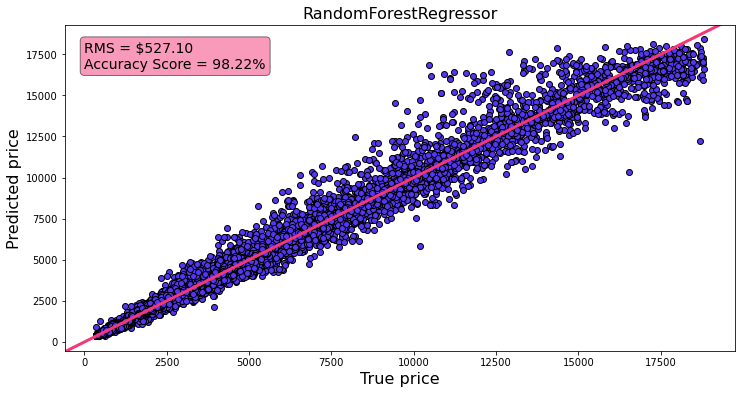

In [474]:
plot_model_accuracy(y_test, predictedRForest, randForest)

In [22]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictedRForest))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictedRForest))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictedRForest)))

Mean Absolute Error: 273.17982214833324
Mean Squared Error: 281656.3744995536
Root Mean Squared Error: 530.7130811460686


In [ ]:
#some bullshit i copied
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=3)
	return X, y
 
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore ratios from 10% to 100% in 10% increments
	for i in arange(0.1, 1.1, 0.1):
		key = '%.1f' % i
		# set max_samples=None to use 100%
		if i == 1.0:
			i = None
		models[key] = RandomForestClassifier(max_samples=i)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X, y)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>0.1 0.856 (0.029)
>0.2 0.879 (0.026)
>0.3 0.881 (0.026)
>0.4 0.890 (0.026)
>0.5 0.896 (0.031)
>0.6 0.897 (0.027)


# Stacking Regressor

In [153]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor, StackingRegressor, RandomForestRegressor

In [159]:
estimators = [
    ('lasso', Lasso(random_state=42)),
    ('ridge', Ridge(random_state=42)),
    ('lr', LinearRegression()),
    ('xgboost', xgb.XGBRegressor(objective="reg:squarederror", random_state=42))
    #('bagging', BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=42)
    #)
  #  ('svr_lin', SVR(kernel='linear'))
]


stackreg= StackingRegressor(
    estimators=estimators,
     final_estimator=RandomForestRegressor(n_estimators=10,
                                           random_state=42))

In [160]:
stackreg.fit(X_train, y_train.values.ravel())

StackingRegressor(estimators=[('lasso', Lasso(random_state=42)),
                              ('ridge', Ridge(random_state=42)),
                              ('lr', LinearRegression()),
                              ('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                              

In [162]:
predictedstreg = stackreg.predict(X_test)
predictedstreg = predictedstreg.reshape((predictedstreg.shape[0], 1))

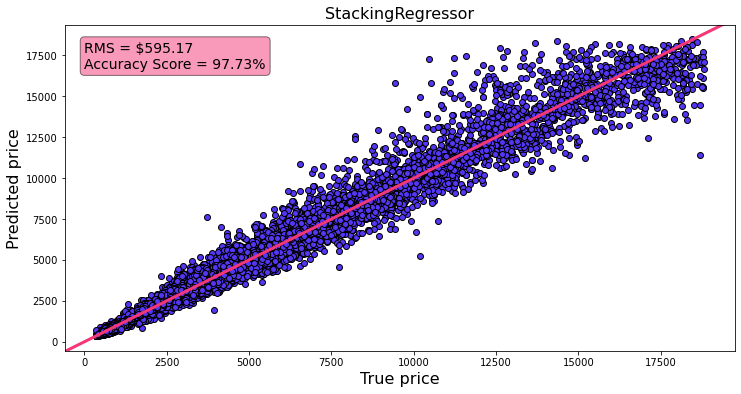

In [475]:
plot_model_accuracy(y_test, predictedstreg, stackreg)